With what information does Bayes Theorem update our previous knowledge about the data parameters?

- Posterior probability is calculated by updating the prior probability by using Bayes' theorem.

What does the prior probability represent?

- Prior probability is the probability of an event before new data is collected. It represents what is originally believed before new evidence is introduced.

# **Step by Step:**

1. Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag.
Use the tables in the previous exercise to calculate:
* The prior probability of Type = Red and Type = White.
* The probability of high and low alcohol content.
* The probability of high and low sugar content.
* The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
* The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
* The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
* The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

url1="https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv"
url2="https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv"
wine_flag_train= pd.read_csv(url1)
wine_flag_test=pd.read_csv(url2)
wine_flag_train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


In [ ]:
t_ta=pd.crosstab(wine_flag_train['Type'],wine_flag_train['Alcohol_flag'])
t_ta['Total']=t_ta.sum(axis=1)
t_ta.loc['Total']=t_ta.sum()

t_ts=pd.crosstab(wine_flag_train['Type'],wine_flag_train['Sugar_flag'])
t_ts['Total']=t_ts.sum(axis=1)
t_ts.loc['Total']=t_ts.sum()


print(t_ta)
print('--------------------------------')
print(t_ts)

Alcohol_flag  High  Low  Total
Type                          
Red            218  282    500
White          268  232    500
Total          486  514   1000
--------------------------------
Sugar_flag  High  Low  Total
Type                        
Red          116  384    500
White        300  200    500
Total        416  584   1000


In [ ]:
print(f"The prior probability of Type = Red is {500/1000} and Type = White is {500/1000}")
print(f"The probability of high alcohol content is {486/1000} and of low alcohol content is {514/1000}")
print(f"The probability of high sugar content is {416/1000} and of low sugar content is {584/1000}")
print(f"The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) is {218/500} and p(Alcohol_flag = Low ∣ Type = Red) is {282/500}")
print(f"The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is {268/500} and p(Alcohol_flag = Low ∣ Type = White) is {232/500}")
print(f"The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is {116/500} and p(Sugar_flag = Low ∣ Type = Red) is {384/500}")
print(f"The conditional probabilities p(Sugar_flag = High ∣ Type = White) is {300/500} and p(Sugar_flag = Low ∣ Type = White) is {200/500}")

The prior probability of Type = Red is 0.5 and Type = White is 0.5
The probability of high alcohol content is 0.486 and of low alcohol content is 0.514
The probability of high sugar content is 0.416 and of low sugar content is 0.584
The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) is 0.436 and p(Alcohol_flag = Low ∣ Type = Red) is 0.564
The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is 0.536 and p(Alcohol_flag = Low ∣ Type = White) is 0.464
The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is 0.232 and p(Sugar_flag = Low ∣ Type = Red) is 0.768
The conditional probabilities p(Sugar_flag = High ∣ Type = White) is 0.6 and p(Sugar_flag = Low ∣ Type = White) is 0.4


2. Use the probabilities in the previous exercise to discuss
* How likely it is that a randomly selected wine is red.
* How likely it is that a randomly selected wine has a high alcohol content.
* How likely it is that a randomly selected wine has a low sugar content.


*Answer:*
- The probability of a randomly selected wine is red is 0.5
- The probability of a randomly selected wine has a high alcohol content is 0.486
- The probabililty of a randonly selected wine has a low sugar content is 0.584



3. Use the conditional probabilities found earlier to discuss
* What a typical white wine might have as its alcohol and sugar content.
* What a typical red wine might have as its alcohol and sugar content.

*Answer:*
- A typical white wine might have high sugar content (60%). However, it's hard to tell the alcohol level since the probability of both high alcohol content and low alcohol content are pretty similar. (54% and 46%)
- A typical red wine might have low sugar content (77%). However, like the answer above, it's hard to tell the alcohol level since the probability of both high alcohol content and low alcohol content are pretty similar. (44% and 56%) 

4. Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.


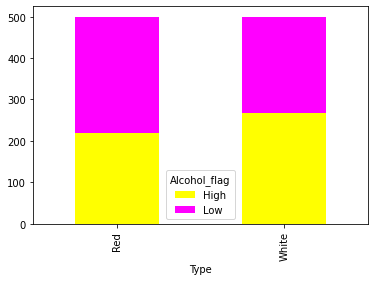

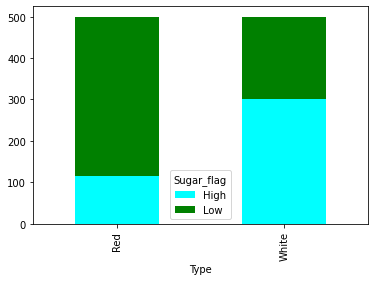

In [ ]:
t_ta_plot=pd.crosstab(wine_flag_train['Type'],wine_flag_train['Alcohol_flag'])
t_ta_plot.plot(kind='bar', stacked=True, color=['yellow','magenta'])

t_ts_plot=pd.crosstab(wine_flag_train['Type'],wine_flag_train['Sugar_flag'])
t_ts_plot.plot(kind='bar',stacked=True, color=['cyan','green'])

5. Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

In [ ]:
t_as=pd.crosstab(wine_flag_train['Alcohol_flag'],wine_flag_train['Sugar_flag'])
t_as['Total']=t_as.sum(axis=1)
t_as.loc['Total']=t_as.sum()
print(t_as)

print()

"""p(Red|LowA HighS)= p(LowA HighS|Red)*p(Red)  /  p(LowA HighS)
p(White|LowA HighS)=p(LowA HighS|White)*p(White)  /  p(LowA HighS)"""

num1= (282/500)*(116/500)*0.5
den1=(514/1000)*(416/1000)
print(f"The posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content is {num1/den1}")

num2= (232/500)*(300/500)*0.5
den2= (514/1000)*(416/1000)
print(f"The posterior probability of Type = White for a wine that is low in alcohol content and high in sugar content is {num2/den2}")

Sugar_flag    High  Low  Total
Alcohol_flag                  
High           185  301    486
Low            231  283    514
Total          416  584   1000

The posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content is 0.30597126608799763
The posterior probability of Type = White for a wine that is low in alcohol content and high in sugar content is 0.6510026938042502


6. Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

- Red wine is more probable for a wine with high alcohol and low sugar content.

In [ ]:
"""p(Red|HighA LowS)= p(HighA LowS|Red)*p(Red)  /  p(HighA LowS)
p(White|HighA LowS)= p(HighA LowS|White)*p(White)  /  p(HighA LowS)"""

num3= (218/500)*(384/500)*0.5
den3= (486/1000)*(584/1000)
print(f"The posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content is {num3/den3}")

num4= (268/500)*(200/500)*0.5
den4= (486/1000)*(584/1000)
print(f"The posterior probability of Type = White for a wine that is high in alcohol content and low in sugar content is {num4/den4}")

The posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content is 0.5898866903433114
The posterior probability of Type = White for a wine that is high in alcohol content and low in sugar content is 0.37769885562884054


7. Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 

#Convert dummy
wine_flag_train2= wine_flag_train
wine_flag_train2['Type']=wine_flag_train2['Type'].replace({'White':0})
wine_flag_train2['Type']=wine_flag_train2['Type'].replace({'Red':1})
wine_flag_train2['Alcohol_flag']=wine_flag_train2['Alcohol_flag'].replace({'High':1})
wine_flag_train2['Alcohol_flag']=wine_flag_train2['Alcohol_flag'].replace({'Low':0})
wine_flag_train2['Sugar_flag']=wine_flag_train2['Sugar_flag'].replace({'High':1})
wine_flag_train2['Sugar_flag']=wine_flag_train2['Sugar_flag'].replace({'Low':0})


wine_flag_test2= wine_flag_test
wine_flag_test2['Type']=wine_flag_test2['Type'].replace({'White':0})
wine_flag_test2['Type']=wine_flag_test2['Type'].replace({'Red':1})
wine_flag_test2['Alcohol_flag']=wine_flag_test2['Alcohol_flag'].replace({'High':1})
wine_flag_test2['Alcohol_flag']=wine_flag_test2['Alcohol_flag'].replace({'Low':0})
wine_flag_test2['Sugar_flag']=wine_flag_test2['Sugar_flag'].replace({'High':1})
wine_flag_test2['Sugar_flag']=wine_flag_test2['Sugar_flag'].replace({'Low':0})


In [ ]:
X_Alcohol_ind_test=np.array(wine_flag_test2['Alcohol_flag'])
(X_Alcohol_ind_test,X_Alcohol_ind_dict_test)=stattools.categorical(X_Alcohol_ind_test,drop=True,dictnames=True)
X_Alcohol_ind_test=pd.DataFrame(X_Alcohol_ind_test)

X_Sugar_ind_test=np.array(wine_flag_test2['Sugar_flag'])
(X_Sugar_ind_test,X_Sugar_ind_dict_test)=stattools.categorical(X_Sugar_ind_test,drop=True,dictnames=True)
X_Sugar_ind_test=pd.DataFrame(X_Sugar_ind_test)


X_test=pd.concat((X_Alcohol_ind_test, X_Sugar_ind_test), axis=1)


Y_test=wine_flag_test2['Type']



NB = GaussianNB()
nb_01 = NB.fit(X_test, Y_test)   
y_predict = nb_01.predict(X_test)
print("Accuracy NB: {:.2f}".format(NB.score(X_test, Y_test))) 




Accuracy NB: 0.66


8. Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [ ]:
Ypred=pd.crosstab(wine_flag_test2['Type'],y_predict, rownames=['Actual'],colnames=['Predicted'])
Ypred['Total']=Ypred.sum(axis=1)
Ypred.loc['Total']=Ypred.sum()
print(Ypred)
print('-----------------------------')
print(f"Accuracy: {(1082+464)/2345}")
print(f"Error Rate: {(121+678)/2345}")

Predicted     0     1  Total
Actual                      
0          1082   678   1760
1           121   464    585
Total      1203  1142   2345
-----------------------------
Accuracy: 0.6592750533049041
Error Rate: 0.34072494669509595


9. According to your table in the previous exercise, find the following values for the Naïve Bayes model:

*   Accuracy
*   Error rate

*Answer:*
- Accuracy: 0.66
- Error rate: 0.34

10. According to your contingency table, find the following values for the Naïve Bayes model:
* How often it correctly classifies red wines.
* How often it correctly classifies white wines.

In [ ]:
print(464/1142)
print(1082/1203)

0.4063047285464098
0.8994181213632585


*Answer:*
- How often it correctly classifies red wines: 40.63%
- How often it correctly classifies white wines: 89.94%

11. Name a few classification algorithm, choose one and use it on a dataset of your choosing.

*Answer:*
- Logistic Regression, Naïve Bayes, Decision Tree, Clustering, Random Forest. I used Naïve Bayes algorithm for this exercise.

12. Apply ANN and decision tree algorithm on the wine dataset and compare the result? which one is better and why?

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp.fit(X_test, Y_test.values.ravel())

mlp_predict = mlp.predict(X_test)  
print("Accuracy ANN: {:.2f}".format(mlp.score(X_test, Y_test)))


Accuracy ANN: 0.77


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_test, Y_test)

res_pred = decision_tree.predict(X_test)
score = decision_tree.score(X_test, Y_test)
print("Accuracy Decision Tree: {:.2f}".format(score))

Accuracy Decision Tree: 0.77
